# Practical lab: Logistic Regression by using the gradient descent algorithm

## Utils

In [157]:
import os # working directory
import pandas as pd # data analysis
import  scipy
from scipy import stats # descriptive statistics
import matplotlib.pyplot as plt # graphics
import numpy as np # maths
import seaborn as sns #graphics
import sklearn.preprocessing # data standardisation
from collections import Counter # table frequency

from sklearn import datasets # data
from sklearn.linear_model import LogisticRegression    # Logistic Regression
from sklearn.model_selection import train_test_split # train and test samples
from sklearn.metrics import confusion_matrix # confusion matrix
from scipy import optimize # optimisation algorithms


## Data

The data relates to a breast cancer clinical study conducted at the University of Winconsin. This is to predict the status of the tumor (malignant=1 or benign=0) from characteristics of cells taken from patients
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* ···

Objective: to study the probability of having a malignant tumor depending on certain characteristics

The data was originally published by W.N. Street, W.H. Wolberg and O.L. Mangasarian. Nuclear feature extraction for breast tumor diagnosis. IS&T/SPIE 1993 International Symposium on Electronic Imaging : Science and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

The practical lab includes the following steps (you must fill in the different notebook cells)
* Import data
* Build the necessary functions: f, cost, gradient then implement the gradient descent algorithm (some functions are identical to those produced in the case of the linear regression)
* Test for the case of simple logistic regression
* Then extend the test to multiple logistic regression
* Return the model coefficients and the values of the cost function for all iterations
* Vary the parameters of the algorithm (initialization, learning rate) and comment.
* Compare with native Python optimization solutions (no exact solution here)

In [158]:
#-- Data import
breast_cancer_dataset = datasets.load_breast_cancer()
#print(breast_cancer_dataset.DESCR) #prints description of the imported dataset (scikitlearn utils)


In [159]:
print(breast_cancer_dataset)
print(type(breast_cancer_dataset))

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [160]:
#- Descriptive statistics
cancer_dataset=breast_cancer_dataset.data
names = breast_cancer_dataset.feature_names

X_features=pd.DataFrame(cancer_dataset, columns=[names])

X_features=X_features.dropna()
Y_diagnosis=breast_cancer_dataset.target
X_features

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [161]:
#print(X_features)


In [162]:
# Some stats with Counter
Counter(Y_diagnosis) # nb of cases / controls
X_features.groupby(Y_diagnosis).mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


### Plots

C:\Users\ariol\AppData\Local\Temp\ipykernel_19228\2810238190.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(index, figsize=(5,4))


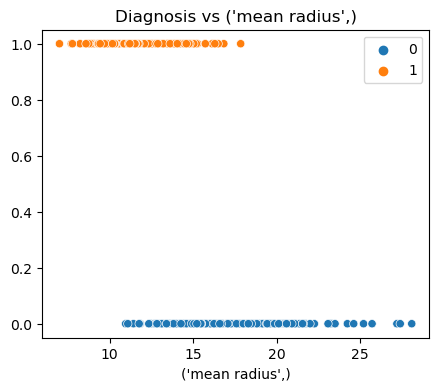

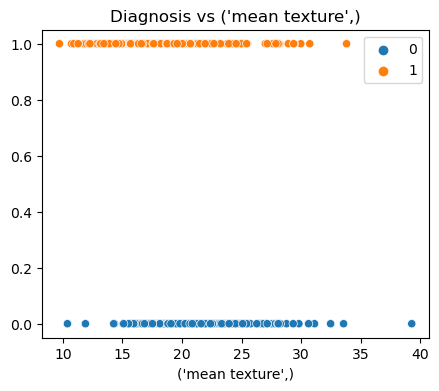

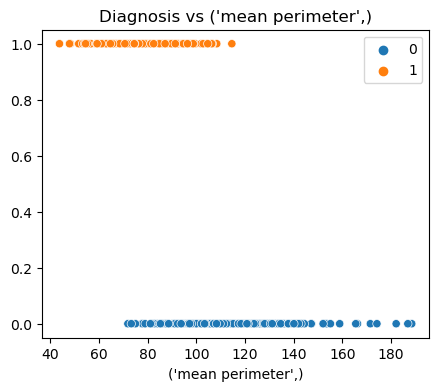

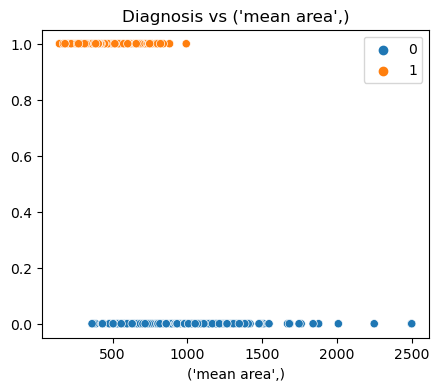

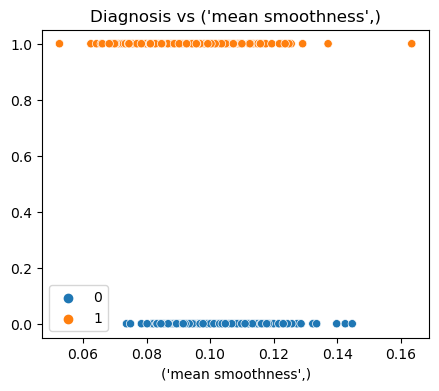

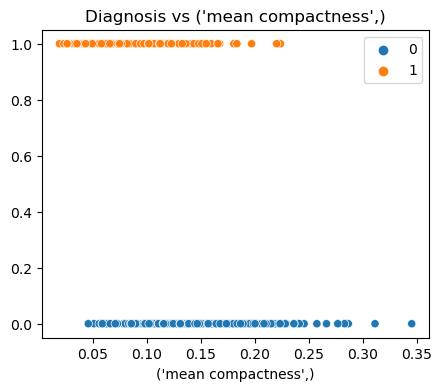

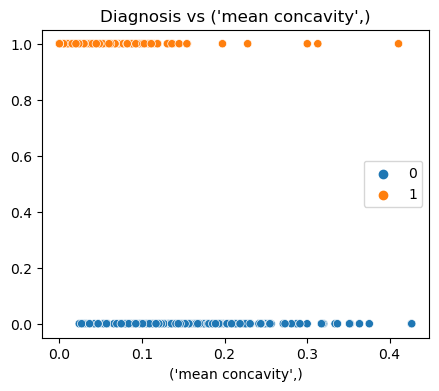

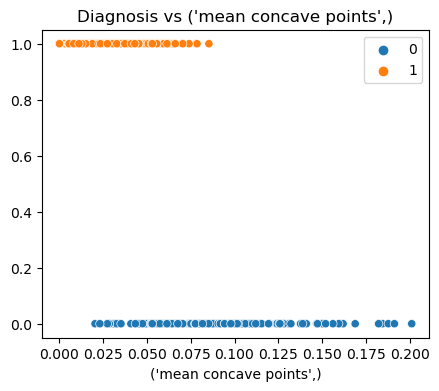

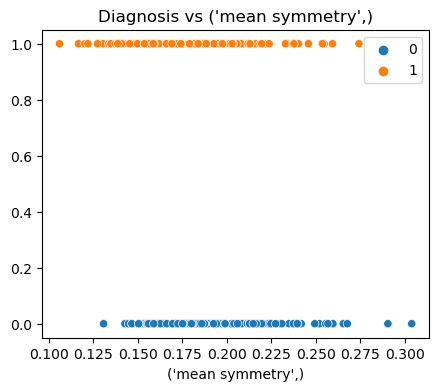

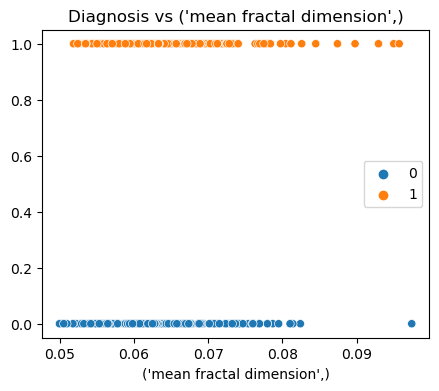

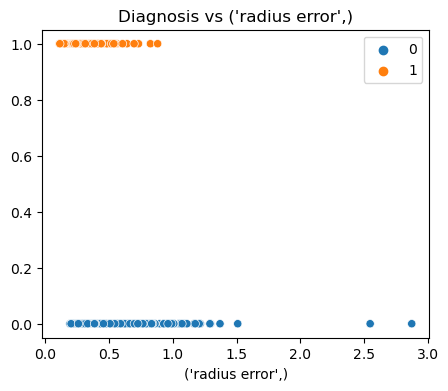

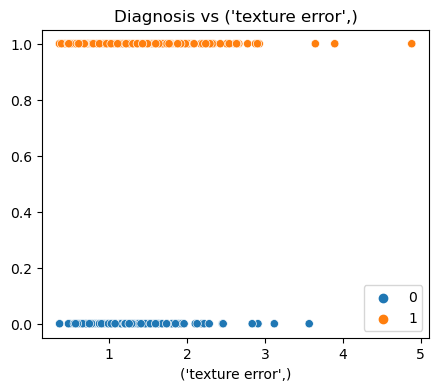

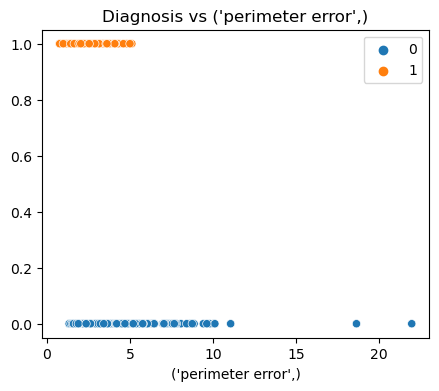

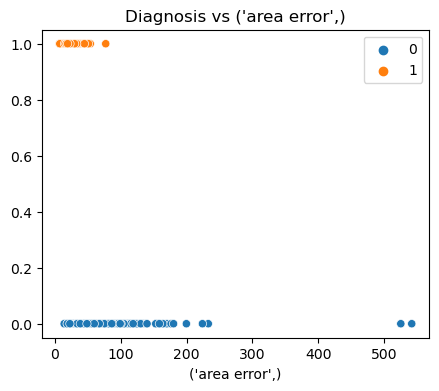

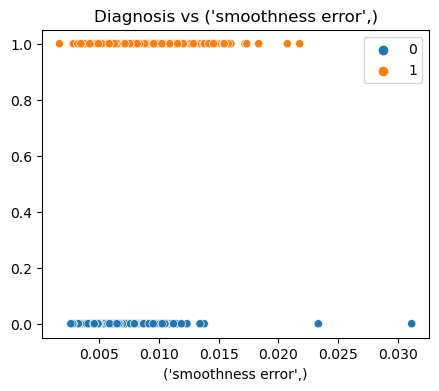

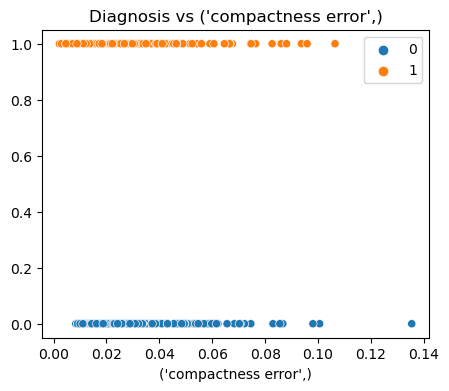

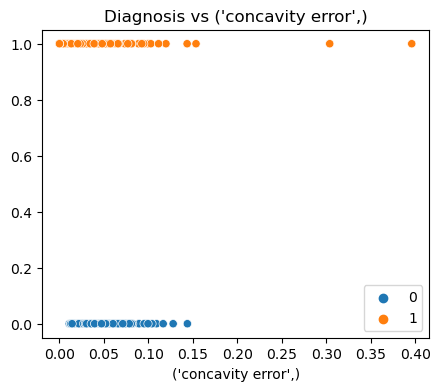

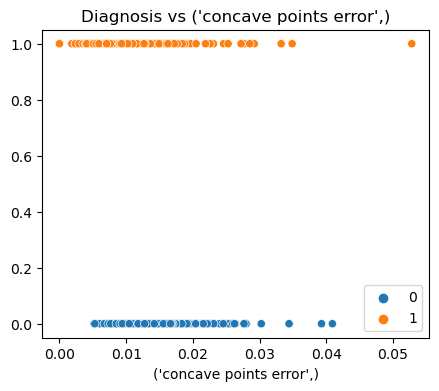

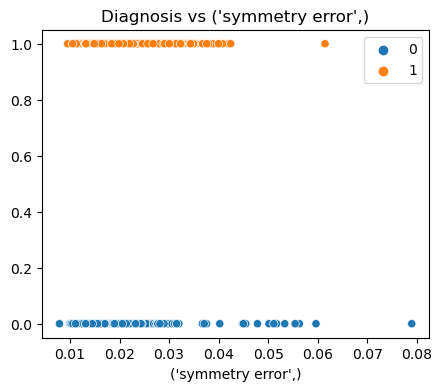

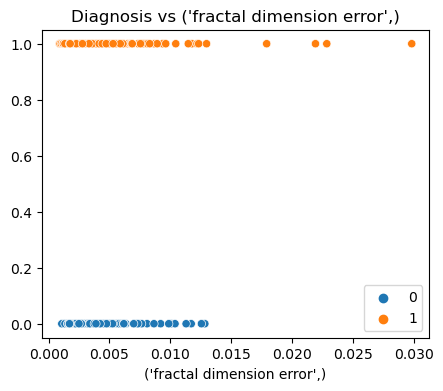

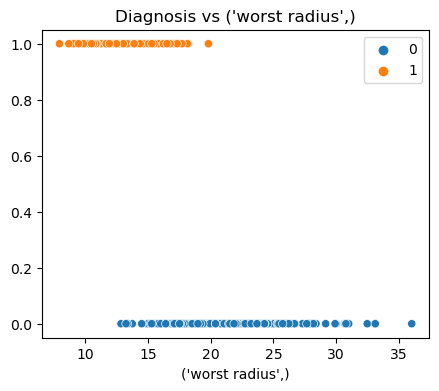

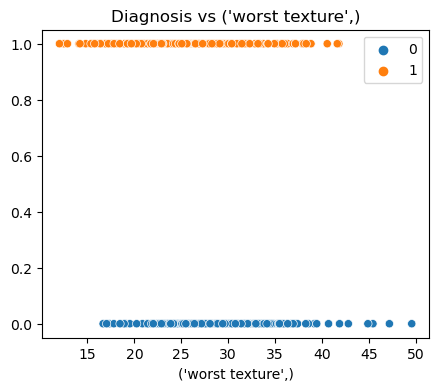

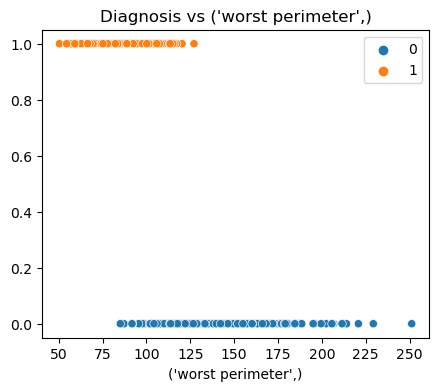

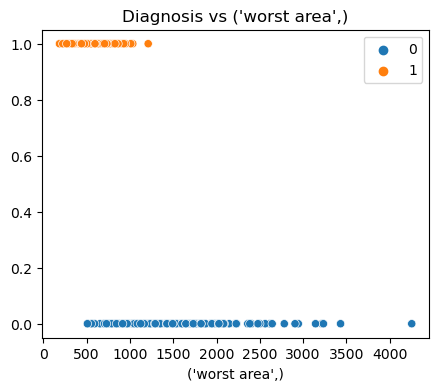

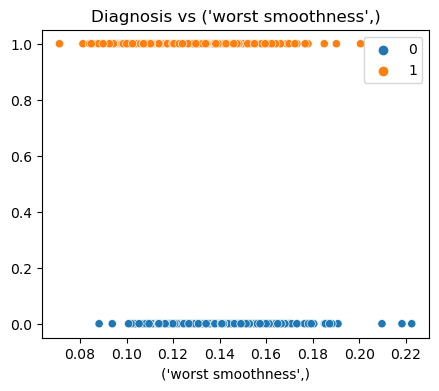

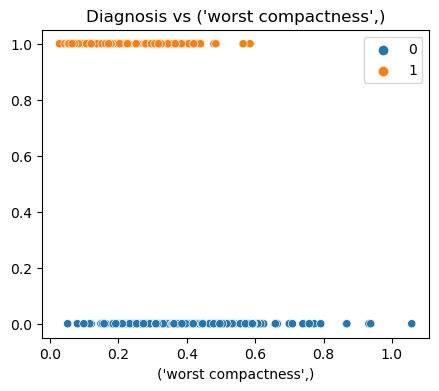

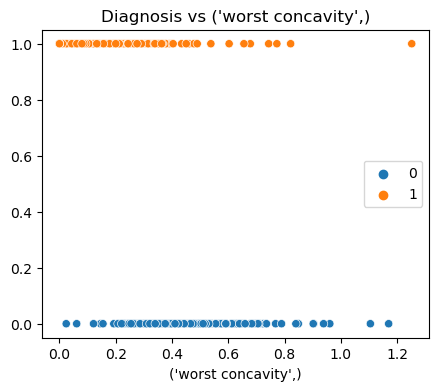

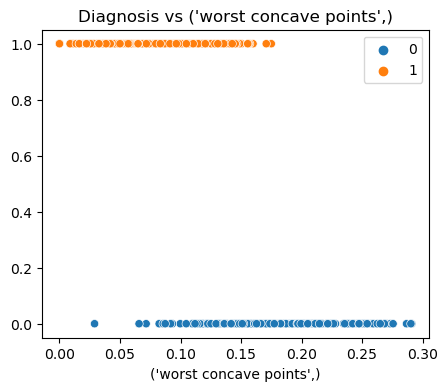

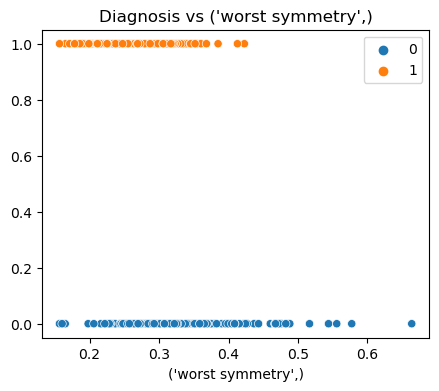

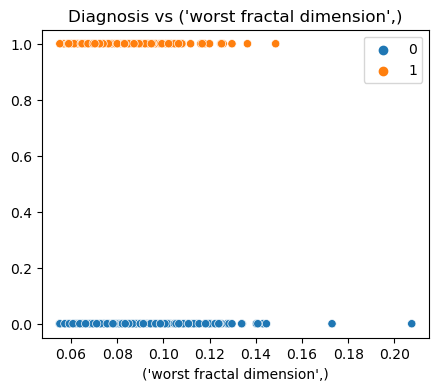

In [163]:
#Scatter Plots
for index,columns in enumerate(X_features):
    plt.figure(index, figsize=(5,4))
    sns.scatterplot(x=columns, y=Y_diagnosis, data=X_features, hue=Y_diagnosis)
    plt.title('Diagnosis vs '+str(columns))
    #plt.legend(['Benign','Malignant'])

In [164]:
diagnosis=pd.DataFrame(Y_diagnosis, columns=["Diagnosis"])
print(diagnosis)

     Diagnosis
0            0
1            0
2            0
3            0
4            0
..         ...
564          0
565          0
566          0
567          0
568          1

[569 rows x 1 columns]


In [333]:
#join the two dataframes together
dataset= pd.concat([diagnosis, X_features],axis=1)
#print(dataset)

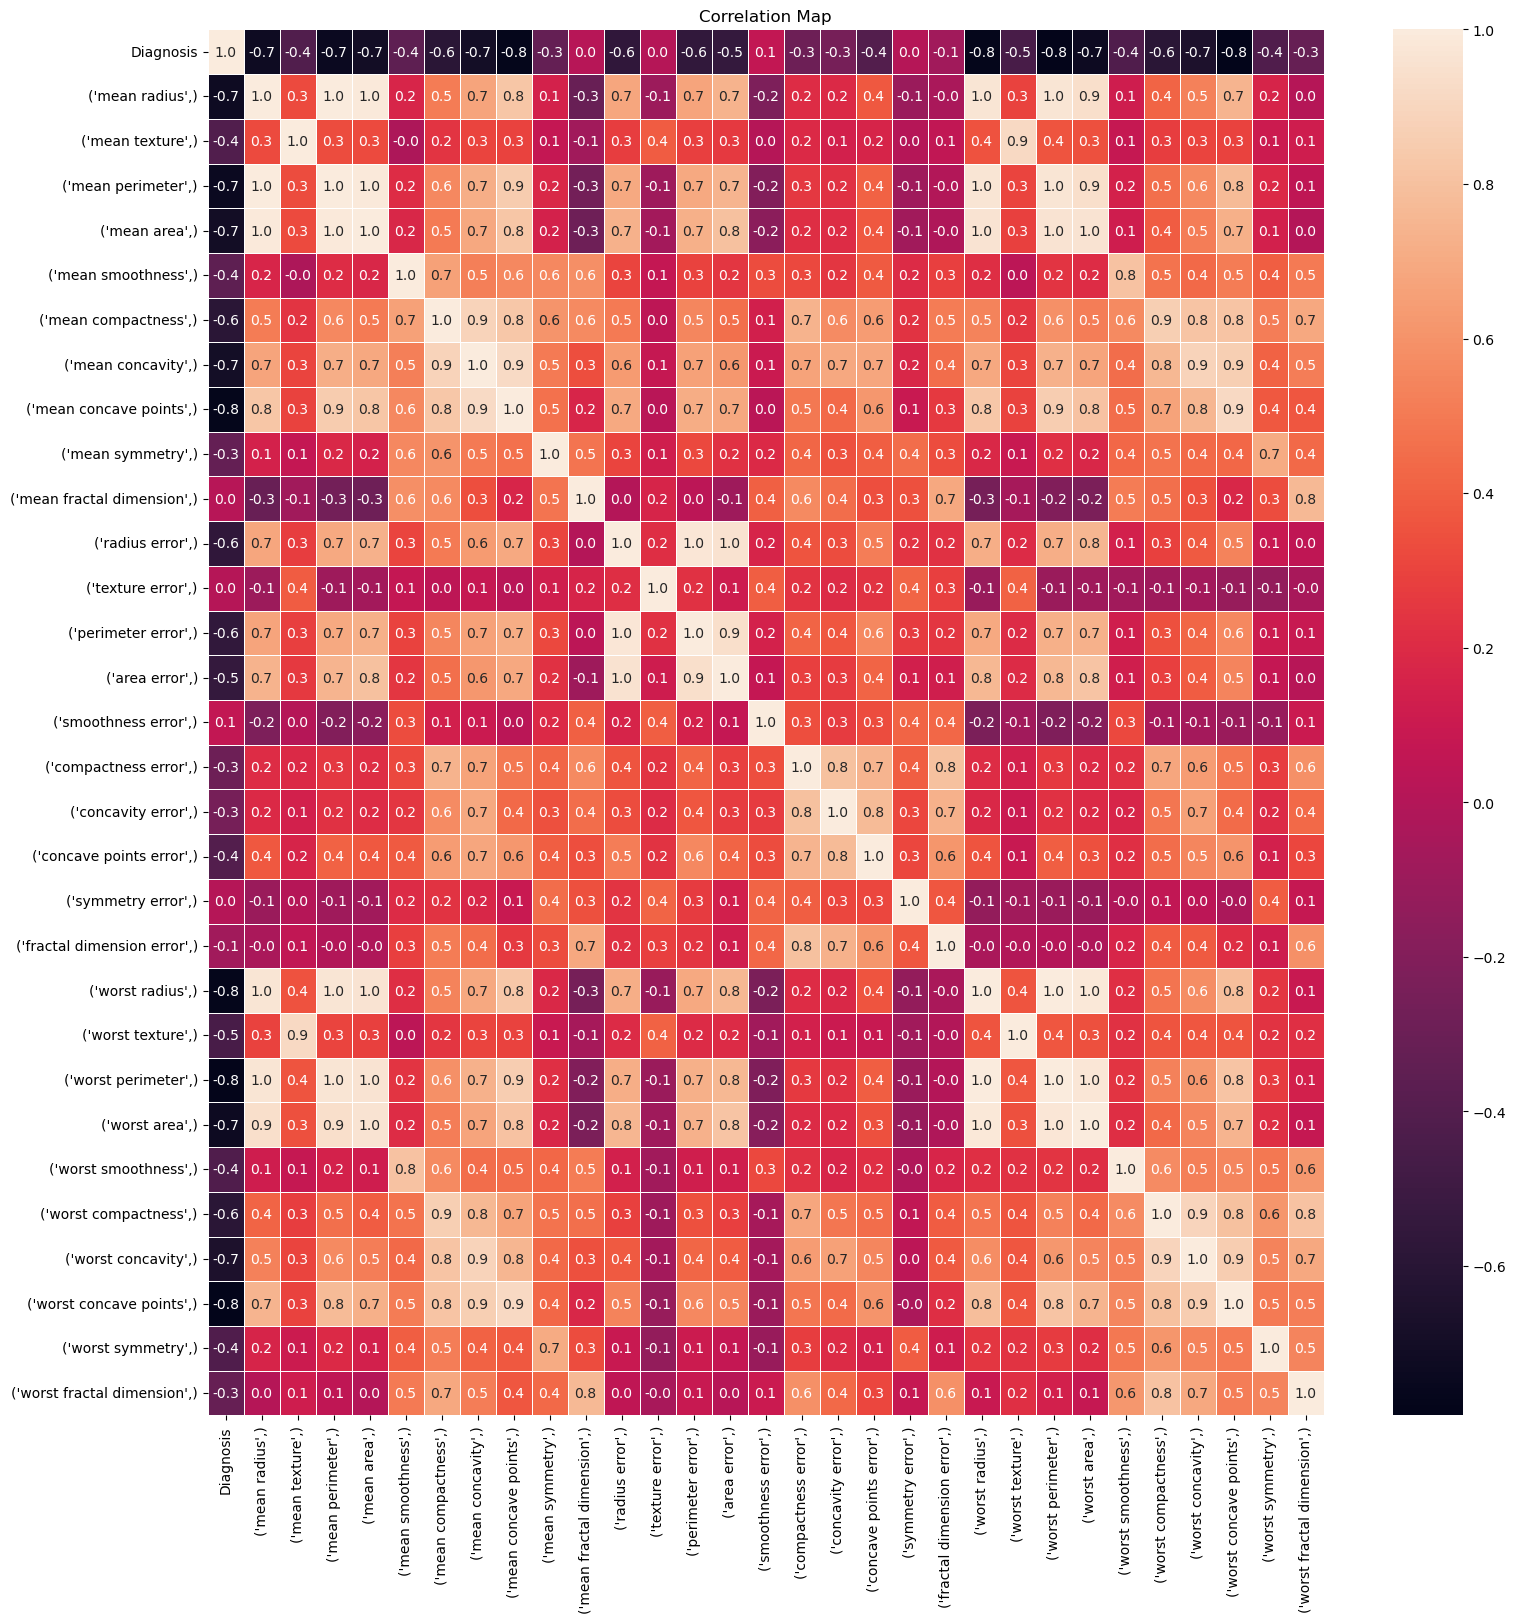

In [166]:
#Correlation plots
f,ax=plt.subplots(figsize = (18,18))
sns.heatmap(dataset.corr(),annot= True,linewidths=0.5,fmt = ".1f",ax=ax)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Correlation Map')
#plt.savefig('graph.png')
plt.show()

Build Variables

In [331]:
#-- Builds Xs and Xm for simple and multiple logistic regresstion
XS = X_features["worst concave points"].to_numpy()
#print(XS)
print(XS.shape)

(569, 1)


In [332]:
XM = X_features[["mean radius", "mean perimeter", "mean area", "mean concave points", "worst concave points", "worst radius"]]
XM = XM.to_numpy()
print(XM)

[[1.799e+01 1.228e+02 1.001e+03 1.471e-01 2.654e-01 2.538e+01]
 [2.057e+01 1.329e+02 1.326e+03 7.017e-02 1.860e-01 2.499e+01]
 [1.969e+01 1.300e+02 1.203e+03 1.279e-01 2.430e-01 2.357e+01]
 ...
 [1.660e+01 1.083e+02 8.581e+02 5.302e-02 1.418e-01 1.898e+01]
 [2.060e+01 1.401e+02 1.265e+03 1.520e-01 2.650e-01 2.574e+01]
 [7.760e+00 4.792e+01 1.810e+02 0.000e+00 0.000e+00 9.456e+00]]


In [169]:
XM.shape

(569, 6)

In [170]:
#print(Y_diagnosis)
#print(Y_diagnosis.shape)

## Logistic regression by using the gradient descent algorithm

In [171]:
###### -- X standardisation
def standardisation(X):
    return (X - np.mean(X, axis = 0)) / (np.std(X, axis = 0, ddof=1))

In [330]:
#-- Test 1 - simple regression
XS_stand = standardisation(XS)
#print(XS_stand)
print(XS_stand.shape)
#print(XS_stand.mean(axis=0))
#print(XS_stand.var(axis=0))

(569, 1)


In [173]:
#-- Test 2 - multiple regression
XM_stand = standardisation(XM)
print(XM_stand)
print(XM_stand.shape)
#print(XM_stand.mean(axis=0))
#print(XM_stand.var(axis=1))

[[ 1.09609953  1.26881726  0.98350952  2.53024886  2.2940576   1.885031  ]
 [ 1.82821197  1.68447255  1.90703027  0.54766227  1.08612862  1.80433981]
 [ 1.5784992   1.56512598  1.55751319  2.03543978  1.95328166  1.51054113]
 ...
 [ 0.70166686  0.67208442  0.57744455  0.10568437  0.41370467  0.56086793]
 [ 1.83672491  1.98078127  1.73369253  2.65652826  2.28797231  1.95951517]
 [-1.80681144 -1.81279344 -1.34660437 -1.26071029 -1.7435287  -1.40965224]]
(569, 6)


In [174]:
ones = np.ones(569,)
Xs= np.insert(XS_stand, 0, ones, axis = 1)
Xs.shape

(569, 2)

In [175]:
ones = np.ones(569,)
Xm= np.insert(XM_stand, 0, ones, axis = 1)
Xm.shape

(569, 7)

In [176]:
#all(np.dot(Xs, beta_Xs.T) == np.dot(Xs, beta_Xs))

In [191]:
#-- Model
# be careful: X contains X_0 = [1,...,1] + X_j
def f(x, beta):
    z = np.dot(x, beta)
    return 1 / (1 + (np.exp(-z)))
    #return np.exp(z) /  (1 + np.exp(z))


In [192]:
beta_Xs = np.random.rand(Xs.shape[1]) # gets random values of beta for the simple linear equation, with just one feature(column)

y_prediction_Xs = f(Xs,beta_Xs)
print("The 1st five Prediction of XS is: " , y_prediction_Xs[:5])
print(y_prediction_Xs.shape[0])

The 1st five Prediction of XS is:  [0.90126715 0.80446571 0.87937811 0.89398338 0.76469095]
569


In [193]:
#-- Test 2 - multiple reg
beta_Xm = np.random.rand(Xm.shape[1]) # gets random values of beta for the simple linear equation, with just one feature(column)

y_prediction_Xm = f(Xm,beta_Xm)
print("The 1st five Prediction of XM is:" ,y_prediction_Xm[:5])
print(y_prediction_Xm.shape[0])

The 1st five Prediction of XM is: [0.99272413 0.98003678 0.9898499  0.7447708  0.98351048]
569


In [194]:
print(beta_Xs)
print(beta_Xm)

[0.69785995 0.65975853]
[0.67940211 0.10371373 0.07577331 0.49907816 0.7591102  0.01476813
 0.838819  ]


### Define Cost Function

In [257]:
#-- Cost function

#cost = -1/m*np.sum(scipy.special.xlogy(1-y,Y_prediction) +  scipy.special.xlogy(1-y,1-Y_prediction))

def cost(x, y, beta):
    fb = f(x, beta)
    m = x.shape[0]
    cost = -(1/m*np.sum(scipy.special.xlogy(y,fb) +  scipy.special.xlogy(1-y,1-fb)))
    #cost = (np.dot(y,np.log(fb)) +  np.dot((1-y), np.log(1-fb))) * (-1/m)
    #cost = -(np.mean(y*(np.log(Y_prediction))+(1-y)*np.log(1-Y_prediction)))
    #cost= - (np.mean((y * np.log(Y_prediction)) + ((1-y) * np.log(1-Y_prediction)))) if ( Y_prediction != 1 and Y_prediction != 0 ) else 0
    return cost

#-- Test 2 - multiple regression


In [258]:
np.log(1-f(Xm, beta_Xm)).shape

(569,)

In [259]:
XS.shape

(569, 1)

In [260]:
#-- Test 1 - simple regression
cost_xs=cost(Xs, Y_diagnosis, beta_Xs)
cost_xs

0.9622222763401181

In [261]:
cost_xm=cost(Xm, Y_diagnosis, beta_Xm)
cost_xm

1.8652399796721093

In [262]:
Y_diagnosis.shape

(569,)

In [263]:
#-- Gradient
def gradient(x, y, beta):
    fb = f(x, beta)
    m = y.shape[0]
    grad = (np.dot((fb-y),x))/(m)
    return grad

#-- Test 1 - simple regression


#-- Test 2 - multiple regression



In [264]:
XS.shape

(569, 1)

In [265]:
# Test 1 - simple reg
gradient_XS = gradient(Xs, Y_diagnosis, beta_Xs )
print(" The Gradient of XS is: ", gradient_XS)

 The Gradient of XS is:  [0.02461516 0.51561297]


In [266]:
# Test 2 - multiple reg
gradient_XM = gradient(Xm, Y_diagnosis, beta_Xm )
print(" The Gradient of XS is: ", gradient_XM)

 The Gradient of XS is:  [-0.07519649  0.6208971   0.62927696  0.5964104   0.63131265  0.63825657
  0.64484525]


In [267]:
def gradient_descent(x, y,beta,alpha):
    # perform one step of gradient descent
    beta_optimal = beta - alpha * gradient(x,y,beta)    
    return beta_optimal

In [268]:
#Test 1 - simple logistics

# learning rate used is 0.1
first_descent_XS = gradient_descent(Xs,Y_diagnosis,beta_Xs,0.1)
print("First Descent beta parameters of XS are ", first_descent_XS)

First Descent beta parameters of XS are  [0.69539844 0.60819723]


In [269]:
#Test 2 - Multiple logistic regression
# learning rate used is 0.1
first_descent_XM = gradient_descent(Xm,Y_diagnosis,beta_Xm,0.1)
print("First Descent beta parameters of XS are ", first_descent_XM)

First Descent beta parameters of XS are  [ 0.68692176  0.04162402  0.01284562  0.43943712  0.69597893 -0.04905753
  0.77433448]


In [ ]:
#first beta initialisation 

# test 1 simple logistics


In [334]:
#%% Gradient descent algorithm

def gradient_descent(x,y, beta,epochs,alpha):
    i = 0
    betas = []
    costFunctions=[]
    for i in range(epochs):
        fb = f(x,beta)
        loss = cost(x, y, beta)  #predict and calculate cost functions at each betas, it takes in Y
        beta_new = beta - alpha * gradient(x,y,beta)   # perform one step of gradient descent
        betas.append(beta)
        costFunctions.append(loss)   
        beta = beta_new  
        i+=1
        
        
        
    #plot the cost function for each iteration
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.plot(costFunctions, label = "MSE:" +str(min(costFunctions)))
    plt.xlabel("Epochs")
    plt.ylabel("Cost Functions")
    plt.title("Cost Function at learning rate" +str(alpha))
    plt.legend()
    
    #plot the beta parameters for each iteration
    plt.subplot(122)
    plt.plot(betas)
    plt.xlabel("Epochs")
    plt.ylabel("Beta")
    plt.title("Betas at learning rate" +str(alpha))
    
    label_s = ["b0", "b1"]
    label_m = ["b0", "b1", "b2", "b3", "b4", "b5", "b6", "b7", "b8", "b9"]
    
    if len(beta) == len(label_s):
        plt.legend(label_s)
    else:
        plt.legend(label_m)   
    #plt.show()
    return beta, min(costFunctions)


### Simple Logistics Regression


*First Initialisation with beta values of zeros*

(array([ 1.12903048, -4.08843243]), 0.22007976111326266)

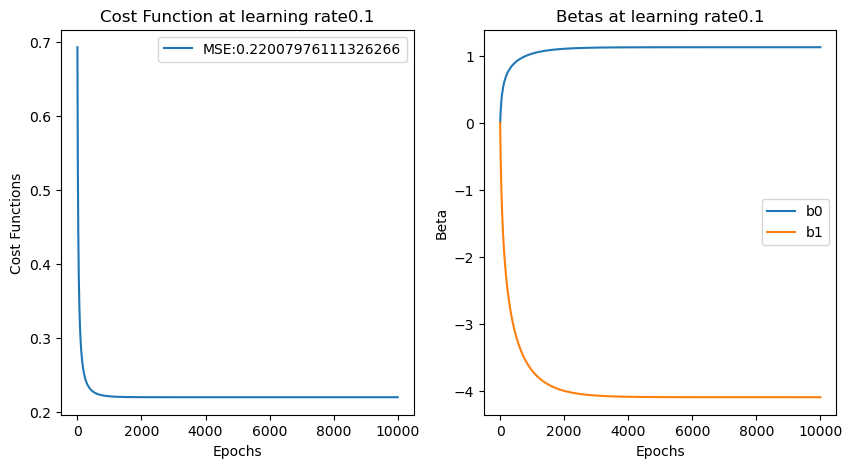

In [298]:
beta_Xs_zeros = np.zeros(Xs.shape[1])
gradient_descent_xs_0 = gradient_descent(Xs,Y_diagnosis, beta_Xs_zeros,10000,0.1)
gradient_descent_xs_0

*Second Initialisation  with beta values of ones*

(array([ 1.12903047, -4.08843238]), 0.22007976111326386)

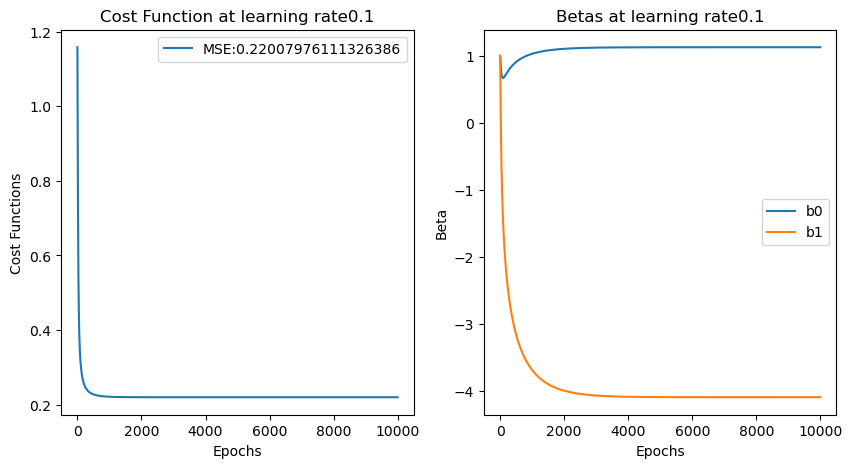

In [299]:
beta_Xs_ones = np.ones(Xs.shape[1])
gradient_descent_xs_1 = gradient_descent(Xs,Y_diagnosis, beta_Xs_ones,10000,0.1)
gradient_descent_xs_1

*Third Initialisation with random values beta values* 

(array([ 1.12903047, -4.08843242]), 0.2200797611132627)

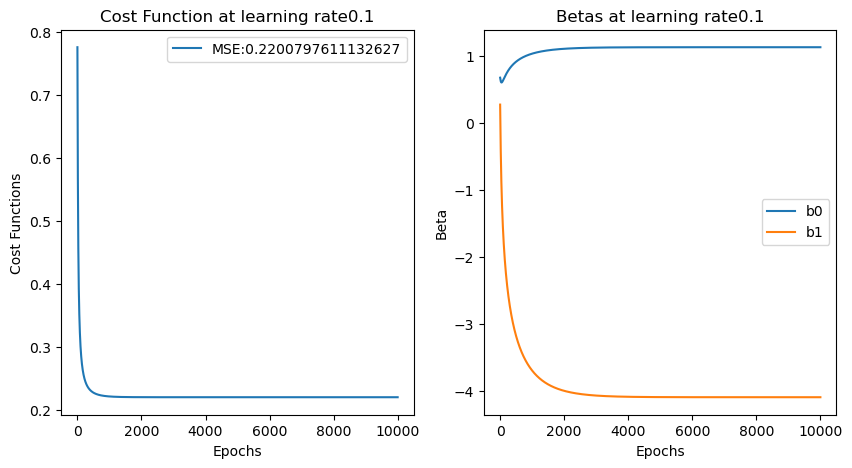

In [306]:
beta_Xs_rand = np.random.rand(Xs.shape[1])
gradient_descent_xs_rand = gradient_descent(Xs,Y_diagnosis, beta_Xs_rand,10000,0.1)
gradient_descent_xs_rand

*Fourth Initialisation with random integer beta values of between 0 and 10*

(array([ 1.12903049, -4.08843248]), 0.2200797611132608)

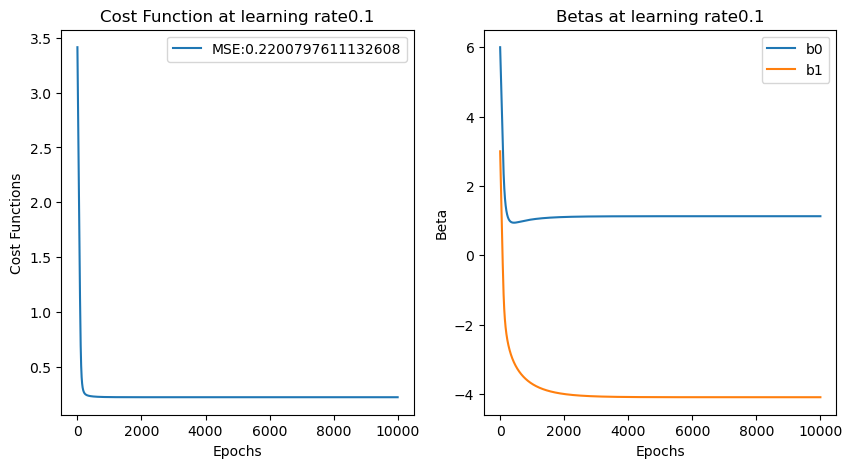

In [307]:
beta_Xs_randint = np.random.randint(10, size=Xs.shape[1])
gradient_descent_xs_randint = gradient_descent(Xs,Y_diagnosis, beta_Xs_randint,10000,0.1)
gradient_descent_xs_randint

### Multiple Logistics Regression

*First Initialisation of beta values with zeros*

(array([ 0.70637219,  0.84735094,  0.95519166, -0.49035939, -1.06749457,
        -2.19055602, -5.24632366]),
 0.1174778977600839)

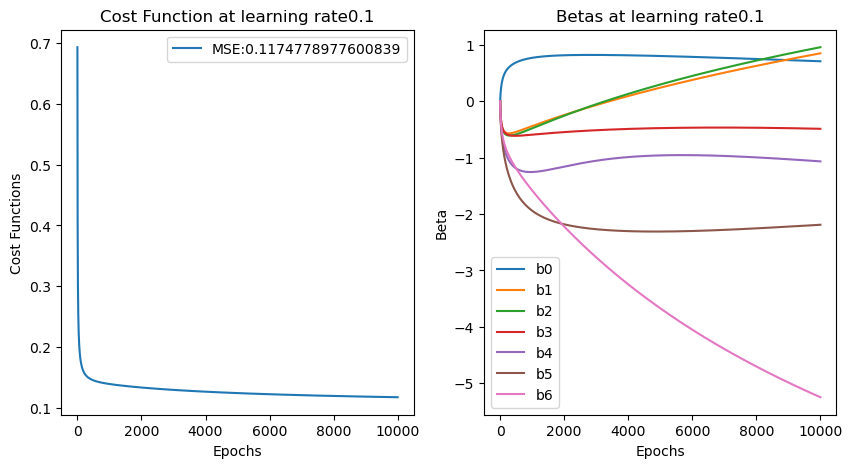

In [301]:
beta_Xm_zeros = np.zeros(Xm.shape[1])
gradient_descent_xm_0 = gradient_descent(Xm,Y_diagnosis, beta_Xm_zeros,10000,0.1)
gradient_descent_xm_0

*Second Initialisation with beta values of ones*

(array([ 0.71377847,  0.81555965,  0.91695117, -0.4169605 , -1.06138429,
        -2.19193358, -5.24697715]),
 0.11756665651941484)

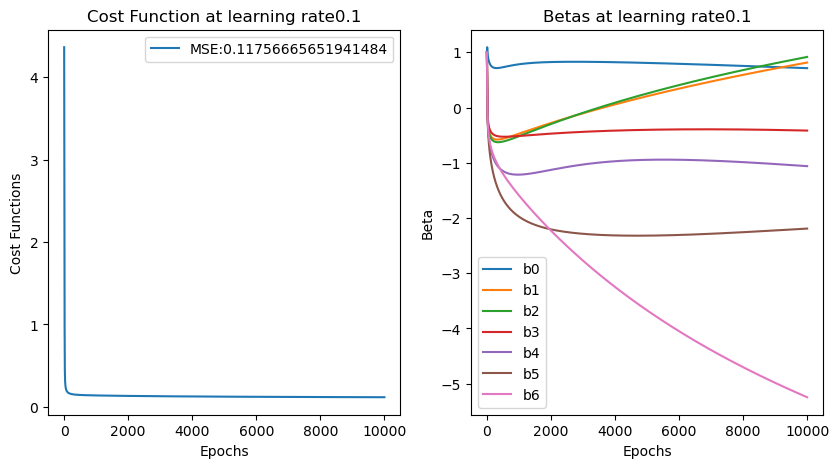

In [302]:
beta_Xm_ones = np.ones(Xm.shape[1])
gradient_descent_xm_1 = gradient_descent(Xm,Y_diagnosis, beta_Xm_ones,10000,0.1)
gradient_descent_xm_1

*Third Initialisation with random beta values*

(array([ 0.69667025,  0.47875746,  1.39004979, -0.34195608, -1.16354615,
        -2.13365096, -5.44345379]),
 0.1168770747523524)

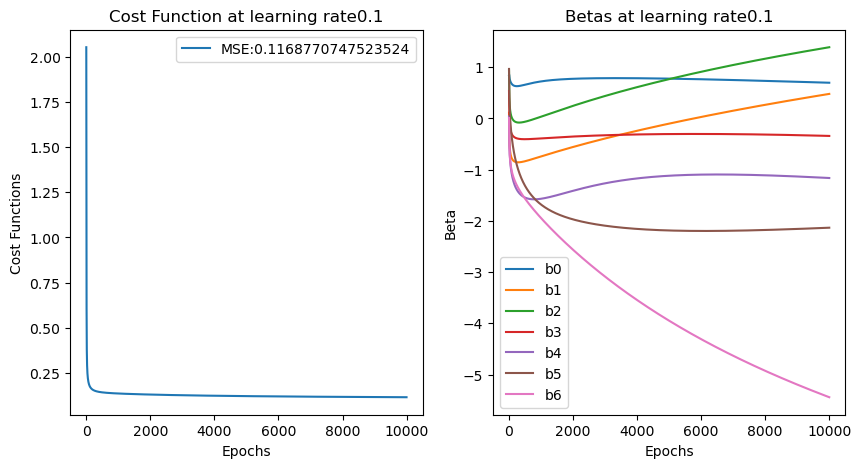

In [308]:
beta_Xm_rand = np.random.rand(Xm.shape[1])
gradient_descent_xm_rand = gradient_descent(Xm,Y_diagnosis, beta_Xm_rand,10000,0.1)
gradient_descent_xm_rand

*Fourth initialisation with random integer beta values of between 0 and 10*

(array([ 0.44969619, -0.46895904,  4.61977954, -1.16830533, -1.85815555,
        -1.79981884, -7.01844118]),
 0.11181323914352607)

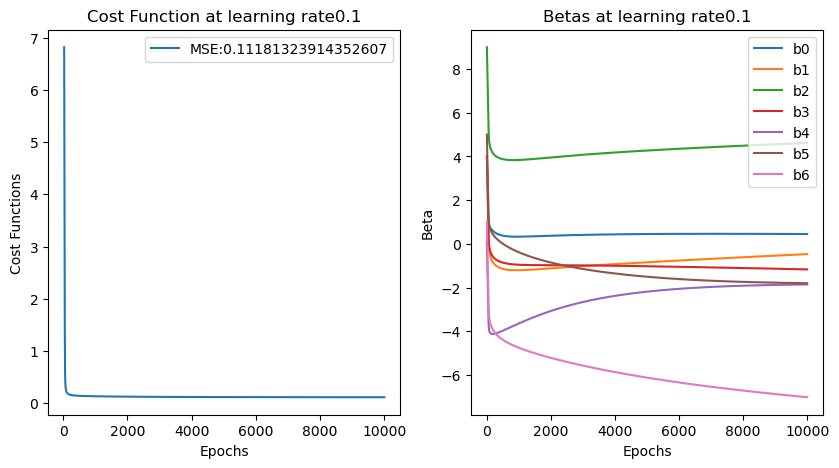

In [310]:
beta_Xm_randint = np.random.randint(10, size=Xm.shape[1])
gradient_descent_xm_randint = gradient_descent(Xm,Y_diagnosis, beta_Xm_randint,10000,0.1)
gradient_descent_xm_randint

COMMENTS

At a learning rate of 0.1, initialising the beta values with zeros and ones have very similar cost function curves, that is the minimum cost is reached after less than 500 iterations. The beta parameters also converge quite easily.

### Experiment with several learning rate: visualisation of the cost function and parameter values during the iterations

In [312]:
#experiment for different learning rates
#learning rates = alpha

alpha = [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]


### Simple Logistic Regression

(array([ 1.12903101, -4.08843462]), 0.22007976111322833)

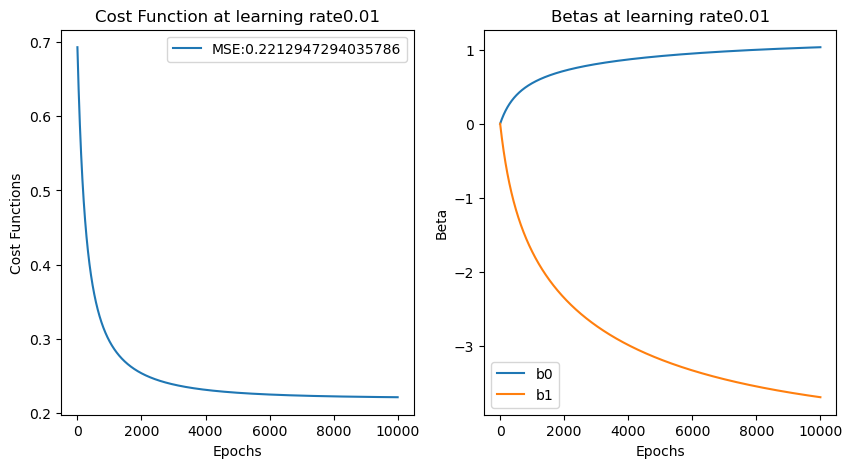

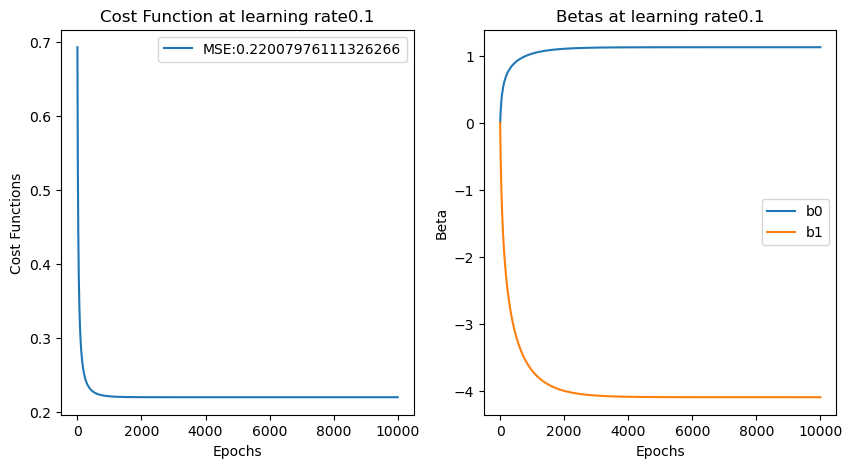

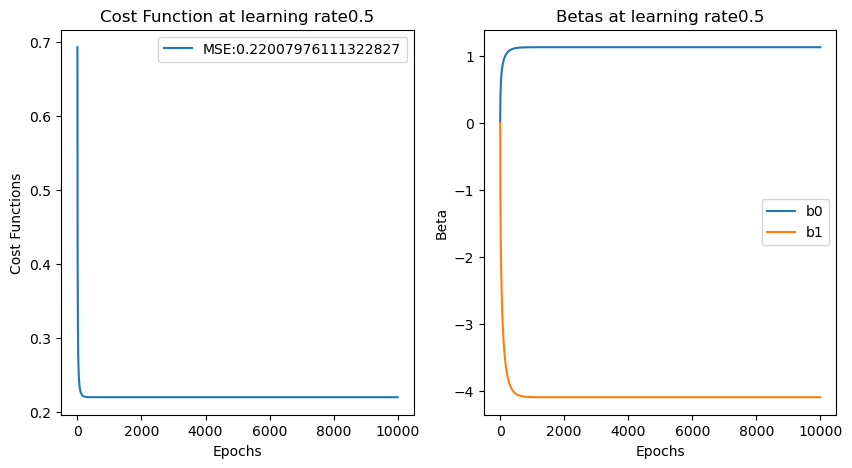

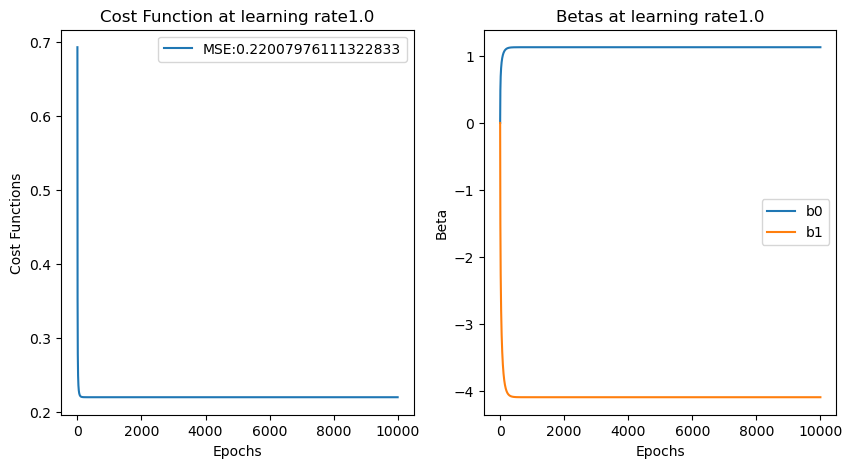

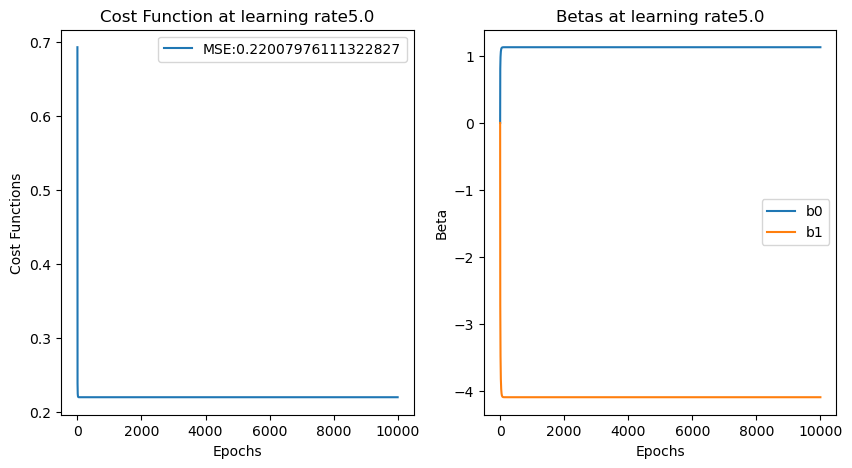

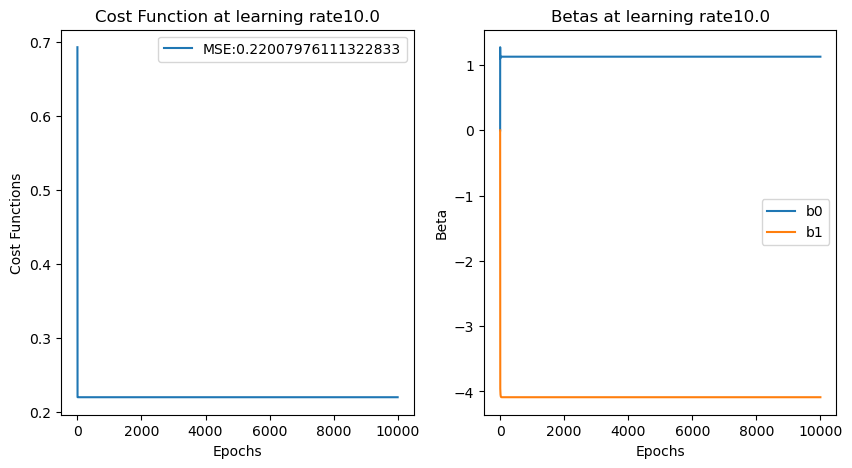

In [314]:

for i in alpha:
    gradient_descent_XS_lr = gradient_descent(Xs,Y_diagnosis, beta_Xs_zeros,10000,i)
gradient_descent_XS_lr

### Multiple Logistic Regression

(array([ -0.92528926,  15.27853895,   2.19517392, -13.69043004,
         -2.09722901,  -1.72719452, -10.48455207]),
 0.1026886659574556)

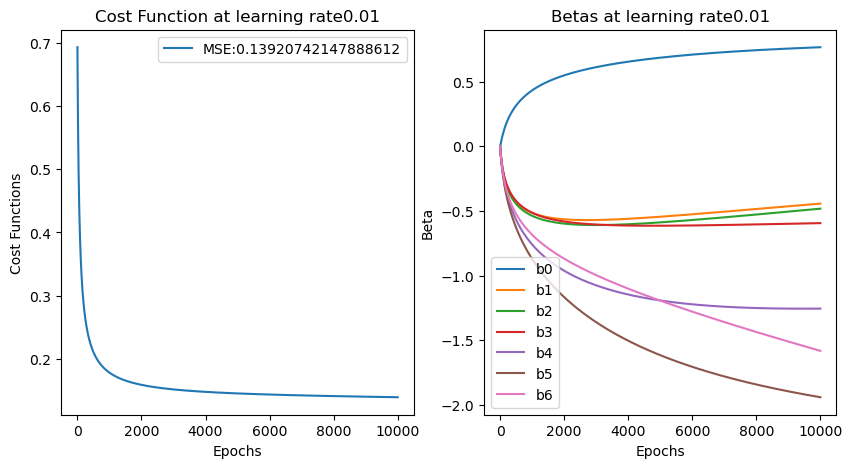

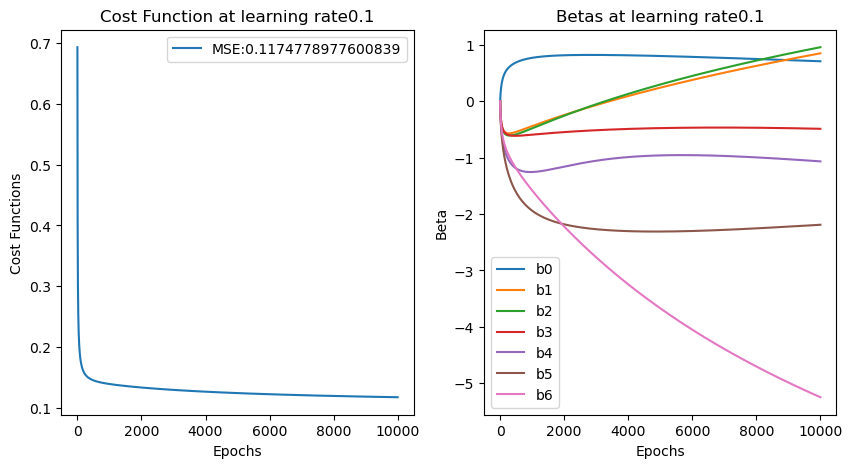

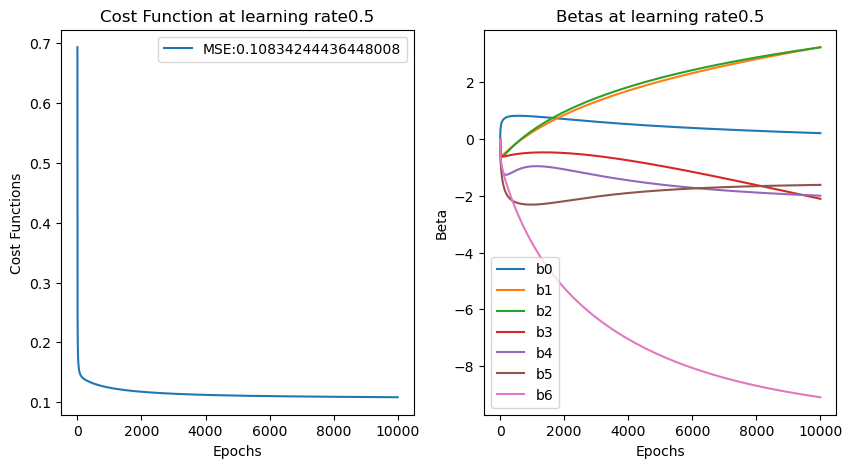

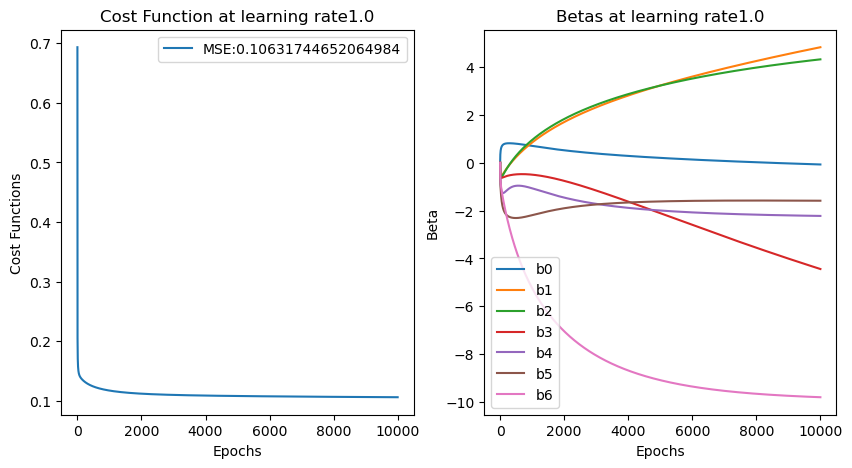

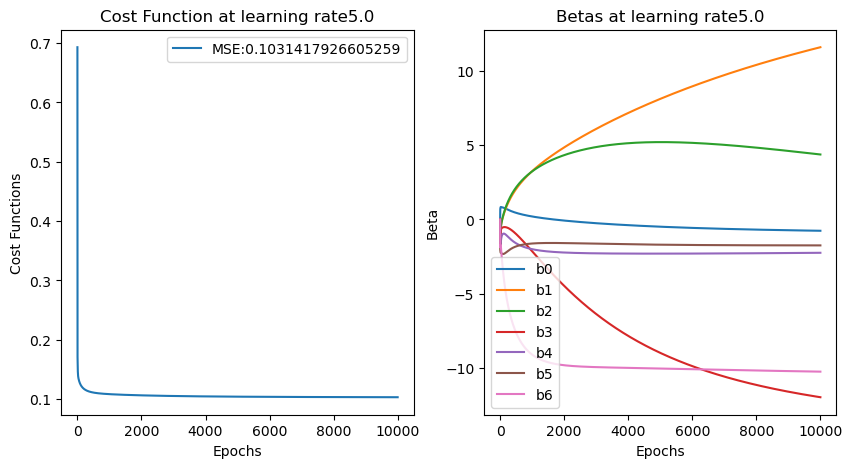

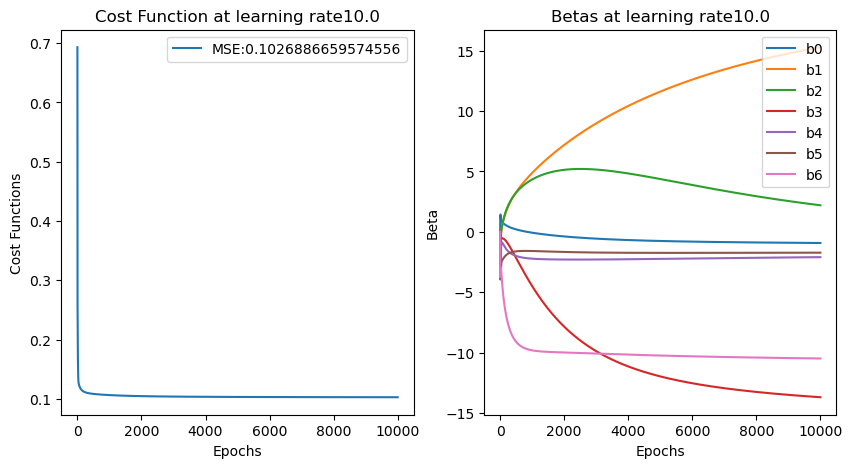

In [315]:
for i in alpha:
    gradient_descent_XM_lr = gradient_descent(Xm,Y_diagnosis, beta_Xm_zeros,10000,i)
gradient_descent_XM_lr

COMMENTS

The learning rate has a very strong effect on the slope of the curve and the stability of the different parameters. As the learning rate increases, stability is attained faster.

### To compare with Python optimisation algorithms

Using the python logistic regression function for the multiple linear regression

In [339]:
#use the multiple regression as data, split training and test set using the function train_test_split from scikitlearn

x_train, x_test, y_train, y_test = train_test_split(Xm, Y_diagnosis, test_size=0.25, random_state=0)

In [340]:
#fit losgistic regression to training set
model = LogisticRegression()
model=model.fit(x_train, y_train)
print(model)

LogisticRegression()


In [341]:
#predict y
y_prediction = model.predict(x_test)

In [342]:
cm_model = confusion_matrix(y_test,y_prediction)
print(cm_model)

[[49  4]
 [ 2 88]]


This output means that there are 49(True Positives) + 88(True Negatives) = 137 correct predictions and 2 (false positives)+ 4(false negatives) incorrect predictions

In [345]:
model_coefficient = model.coef_
print(model_coefficient)

[[ 3.68615466e-05  1.56995540e-01  1.47657841e-01 -3.59612163e-01
  -1.05180406e+00 -1.90061209e+00 -2.82224762e+00]]


In [346]:
model_score = model.score(x_test,y_test)
print(model_score)

0.958041958041958
